In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Step 1: Load dataset
df = pd.read_csv("/content/weatherAUS.csv")

In [32]:
# Step 2: Drop columns with more than 30% missing values
threshold = 0.3 * len(df)
df = df.dropna(thresh=threshold, axis=1)

In [33]:
# Step 3: Drop rows with remaining missing values
df = df.dropna()

In [34]:
# Step 4: Encode binary categories
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [22]:
# Step 5: One-hot encode remaining categorical variables
df = pd.get_dummies(df, drop_first=True)

In [23]:
# Step 6: Features and target
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [24]:
# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Step 8: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Step 9: Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [27]:
# Step 10: Predict and evaluate
y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[8165  634]
 [1077 1408]]

Accuracy: 0.848369372562921

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      8799
           1       0.69      0.57      0.62      2485

    accuracy                           0.85     11284
   macro avg       0.79      0.75      0.76     11284
weighted avg       0.84      0.85      0.84     11284



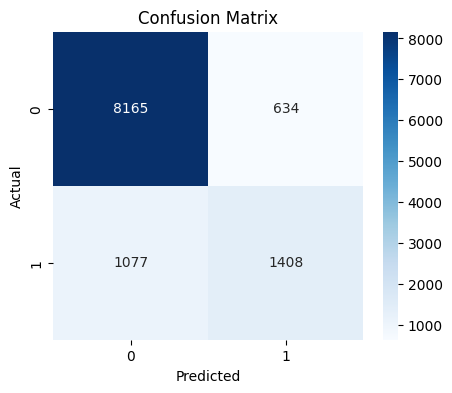

In [28]:
# Step 11: Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

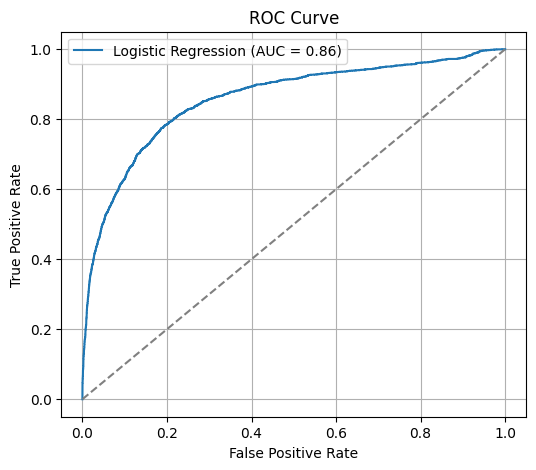

In [30]:
# Step 12: ROC Curve
y_probs = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()